In [2]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def read_indata(path):
    '''
    :param path: a string of path saved the dataset
    :return: pandas datarame
    '''
    data = pd.read_csv(path)
    return data


## generate new column year for every data

def generate_year_month(df, colname):
    '''
    :param df: dataframe we want to add column year and month
    :param colname: a stirng column name in the dataframe saved the dateandtime
    :return: dataframe after adding the column
    '''
    df['year'] = pd.DatetimeIndex(df[colname]).year
    df['month'] = pd.DatetimeIndex(df[colname]).month
    #df['day'] = pd.DatetimeIndex(df[colname]).day

    #df['indextype'] = str(string)
    return df

In [5]:
def city_groupby(df, colname, city_name):
    '''This function mainly is used to process the AQI data.
    :param df: dataframe we want to divide base on city name
    :param colname: the column name in the dataframe saved the city name
    :param city_name: the specific city name 
    :return: dataframe after filter city and year from 2012 to 2018, group by year and month
    '''
    df = df[(df[colname].str.contains(city_name)) & (df.year>=2012) & (df.year<2018)]
    df = df.groupby(['year','month']).agg({'mean'})

    return df

In [90]:
def crime_count(df, date_colname,per):
    '''
    :param df: dataframe we want to count the number of crime
    :param colname: a string column name in the dataframe saved the date
    :return: dataframe after adding the column
    '''
    df['year'] = df[date_colname].str[6:10].astype(int)
    df['month'] = df[date_colname].str[0:2].astype(int)
    df['day'] =  df[date_colname].str[3:5].astype(int)
    df = df[(df.year>=2012) & (df.year<2018)]
    if per == 'month':
        df_per = df[[date_colname,'year', 'month']].groupby(['year', 'month']).count().rename(columns={date_colname:'count'})
    elif per == 'day':
        df_per = df[[date_colname,'year', 'month','day']].groupby(['year', 'month','day']).count().rename(columns={date_colname:'count'})
    #df['indextype'] = str(string)
    return df_per

In [3]:
airpollution=pd.DataFrame()
airpollution_dir = './daily_aqi_by_cbsa/daily_aqi_by_cbsa_'
for i in range(2012,2018):
    file=read_indata(airpollution_dir+str(i)+'.csv')
    airpollution=airpollution.append(file)
airpollution.head()

#extract columns that need to analyze
#airpollution = airpollution[['City', 'Date Local', 'NO2 Mean','NO2 AQI', 'O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]

#extract columns that need to be analyzed
airpollution = airpollution[['CBSA', 'Date', 'AQI']]

airpollution.head()

,CBSA,Date,AQI
0,"Aberdeen, SD",2012-01-01,10
1,"Aberdeen, SD",2012-01-04,13
2,"Aberdeen, SD",2012-01-08,10
3,"Aberdeen, SD",2012-01-10,13
4,"Aberdeen, SD",2012-01-13,22


In [4]:
#generate year and month
airpollution = generate_year_month(airpollution, 'Date')
airpollution.head()

,CBSA,Date,AQI,year,month
0,"Aberdeen, SD",2012-01-01,10,2012,1
1,"Aberdeen, SD",2012-01-04,13,2012,1
2,"Aberdeen, SD",2012-01-08,10,2012,1
3,"Aberdeen, SD",2012-01-10,13,2012,1
4,"Aberdeen, SD",2012-01-13,22,2012,1


# Chicago crime and air pollution

In [178]:
Chicago_airpollution = city_groupby(airpollution, 'CBSA', 'Chicago')
Chicago_airpollution.head()


AQI
                 mean
year month           
2012 1      68.387097
     2      73.551724
     3      76.387097
     4      63.400000
     5      78.290323

In [179]:
Chicago_crime = read_indata('./Chicago_crime_2012-2017.csv')
Chicago_crime.head()
## count chicago crime
#chi_crime_per_month = chicago_crime[['ID', 'year', 'month']].groupby(['year', 'month']).size()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,31.0,20.0,20,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,29.0,25.0,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)"
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,17.0,68.0,11,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)"
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,38.0,17.0,17,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN


In [180]:
Chicago_crime_per_month = crime_count(Chicago_crime, 'Date', 'month')
Chicago_crime_per_month.head()
#crime_count(chicago_crime, 'Date', 'day')

count
year month       
2012 1      26265
     2      23869
     3      28561
     4      27178
     5      30088

In [181]:
Chicago_crime_airpollution = pd.merge(Chicago_airpollution, Chicago_crime_per_month,on=['year','month'])
Chicago_crime_airpollution.columns=['AQI_mean', 'crime_count']

Chicago_crime_airpollution

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      68.387097        26265
     2      73.551724        23869
     3      76.387097        28561
     4      63.400000        27178
     5      78.290323        30088
     6      97.400000        31075
     7      99.419355        31969
     8      93.387097        30034
     9      58.466667        27750
     10     54.225806        27957
     11     72.033333        26025
     12     57.193548        25207
2013 1      60.064516        25457
     2      58.678571        21394
     3      57.258065        24957
     4      56.266667        25521
     5      74.290323        27981
     6      70.233333        27362
     7      75.612903        28618
     8      65.322581        28640
     9      57.066667        26327
     10     54.774194        25458
     11     62.700000        23550
     12     67.645161        21848
2014 1      60.645161        19991
     2      76.428571        18014
     3      68.677419        22175
     4      66.166667        22897
     5      69.774194        24852
     6      73.833333        25414
...               ...          ...
2015 7      78.322581        24192
     8      62.580645        24769
     9      62.100000        23071
     10     49.064516        23050
     11     56.566667        20552
     12     48.290323        21115
2016 1      51.580645        20619
     2      55.551724        18693
     3      57.548387        22009
     4      64.233333        21115
     5      65.580645        23489
     6      85.400000        24016
     7      73.161290        24823
     8      65.709677        24856
     9      49.400000        23639
     10     44.645161        23702
     11     55.166667        21710
     12     52.258065        20346
2017 1      56.645161        22014
     2      57.428571        19258
     3      48.258065        20509
     4      52.266667        21639
     5      60.645161        23332
     6      78.566667        23794
     7      78.032258        24801
     8      60.354839        24660
     9      66.300000        22773
     10     43.838710        22852
     11     53.800000        21456
     12     54.806452        21037

[72 rows x 2 columns]

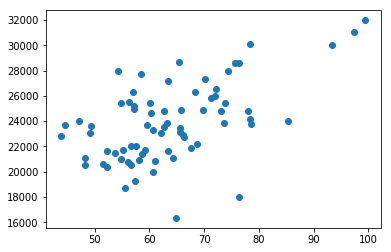

In [182]:
Chicago_crime_airpollution.corr() 
plt.scatter(Chicago_crime_airpollution.AQI_mean, Chicago_crime_airpollution.crime_count)


In [183]:
Chicago_crime_model = ols("crime_count ~ AQI_mean", data=Chicago_crime_airpollution).fit()
Chicago_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     30.94
Date:                Thu, 02 May 2019   Prob (F-statistic):           4.56e-07
Time:                        14:29:14   Log-Likelihood:                -667.16
No. Observations:                  72   AIC:                             1338.
Df Residuals:                      70   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e+04   1748.218      8.185      0.000    1.08e+04    1.78e+04
AQI_mean     149.9422     26.958      5.562      0.000      96.176     203.708
==============================================================================
Omnibus:                        3.974   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.135
Skew:                          -0.410   Prob(JB):                        0.209
Kurtosis:                       3.609   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

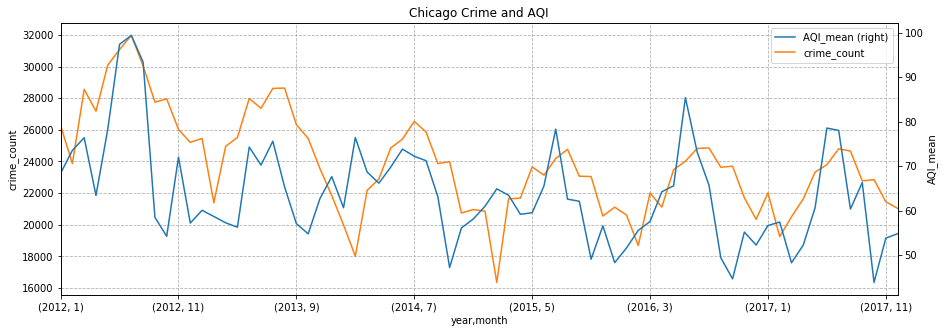

In [184]:
ax = Chicago_crime_airpollution.plot(
    secondary_y=['AQI_mean'],
    
    grid=True,figsize=(15,5))
 
ax.set_title("Chicago Crime and AQI")
ax.set_ylabel('crime_count')
ax.grid(linestyle="--", alpha=3)
ax.right_ax.set_ylabel('AQI_mean')
 
plt.show()

In [186]:
Chicago_crime_type = Chicago_crime[['Primary Type','ID']].groupby(['Primary Type']).count().rename(columns={"ID":'count'})
Chicago_crime_type.sort_values("count", ascending = False).head(30)


,count
Primary Type,
THEFT,391847
BATTERY,311011
CRIMINAL DAMAGE,183242
NARCOTICS,147568
ASSAULT,109862
OTHER OFFENSE,104527
DECEPTIVE PRACTICE,97114
BURGLARY,95777
MOTOR VEHICLE THEFT,71756


# Air pollution in Los Angeles

In [112]:
LA_airpollution = city_groupby(airpollution, 'CBSA', 'Los Angeles')
LA_airpollution.head()

AQI
                  mean
year month            
2012 1       77.354839
     2       65.896552
     3       63.774194
     4       78.433333
     5      111.741935

In [170]:
#LA_crime = read_indata('./LA_Crime_Data_2010_2017.csv')
LA_crime = read_indata('./LA_Crime_Data_2010_to_Present.csv')
LA_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,61000673,04/07/2016,04/07/2016,2043,10,West Valley,1037,886,DISTURBING THE PEACE,1501,...,NaN,IC,Invest Cont,886.0,NaN,NaN,NaN,17100 VANOWEN ST,NaN,"(34.1939, -118.5055)"
1,131609876,04/02/2016,04/01/2016,1900,19,Mission,1902,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,13600 DRONEFIELD AV,NaN,"(34.3196, -118.4561)"
2,150319258,08/20/2016,08/20/2016,30,3,Southwest,325,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,AO,Adult Other,440.0,NaN,NaN,NaN,2800 MENLO AV,NaN,"(34.0294, -118.2903)"
3,151601466,01/01/2016,01/01/2016,2040,16,Foothill,1642,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0334 0411 1402,...,OTHER KNIFE,AA,Adult Arrest,230.0,998.0,NaN,NaN,10500 CAYUGA AV,NaN,"(34.2606, -118.4238)"
4,151601467,01/02/2016,01/02/2016,30,16,Foothill,1668,624,BATTERY - SIMPLE ASSAULT,0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,9800 MARCUS AV,NaN,"(34.2463, -118.2818)"


In [187]:
LA_crime_per_month = crime_count(LA_crime, 'Date Occurred', 'month')
LA_crime_per_month.head()


count
year month       
2012 1      17745
     2      15316
     3      16562
     4      16275
     5      17466

In [173]:
LA_crime_airpollution = pd.merge(LA_airpollution, LA_crime_per_month,on=['year','month'])
LA_crime_airpollution.head()
LA_crime_airpollution.columns=['AQI_mean', 'crime_count']
LA_crime_airpollution.head(15)

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                         
2012 1       77.354839        17745
     2       65.896552        15316
     3       63.774194        16562
     4       78.433333        16275
     5      111.741935        17466
     6      116.266667        17015
     7      123.677419        16956
     8      134.161290        17618
     9      104.300000        16955
     10      73.935484        17207
     11      77.400000        15750
     12      77.225806        16270
2013 1       66.548387        16623
     2       67.892857        14037
     3       83.838710        16177

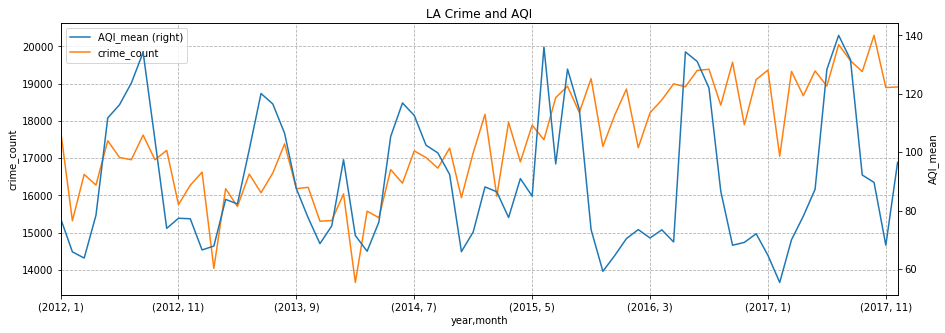

In [174]:
ax = LA_crime_airpollution.plot(
    secondary_y=['AQI_mean'],
    
    grid=True,figsize=(15,5))
 
ax.set_title("LA Crime and AQI")
ax.set_ylabel('crime_count')
ax.grid(linestyle="--", alpha=3)
ax.right_ax.set_ylabel('AQI_mean')
 
plt.show()

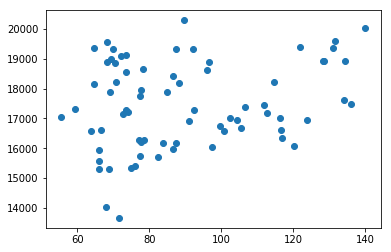

In [175]:
LA_crime_airpollution.corr() 

plt.scatter(LA_crime_airpollution.AQI_mean, LA_crime_airpollution.crime_count)

In [176]:
LA_crime_model = ols("crime_count ~ AQI_mean", data=LA_crime_airpollution).fit()
LA_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.530
Date:                Thu, 02 May 2019   Prob (F-statistic):             0.0368
Time:                        14:28:20   Log-Likelihood:                -623.86
No. Observations:                  72   AIC:                             1252.
Df Residuals:                      70   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e+04    687.062     23.354      0.000    1.47e+04    1.74e+04
AQI_mean      15.7572      7.403      2.128      0.037       0.992      30.523
==============================================================================
Omnibus:                        3.024   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                1.721
Skew:                          -0.043   Prob(JB):                        0.423
Kurtosis:                       2.248   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
LA_crime_type = LA_crime[['Crime Code Description','Crime Code']].groupby(['Crime Code Description']).count().rename(columns={"Crime Code":'count'})
LA_crime_type.sort_values("count", ascending = False).head(30)


,count
Crime Code Description,
BATTERY - SIMPLE ASSAULT,176948
BURGLARY FROM VEHICLE,150446
VEHICLE - STOLEN,149165
THEFT PLAIN - PETTY ($950 & UNDER),138790
BURGLARY,138790
THEFT OF IDENTITY,119127
INTIMATE PARTNER - SIMPLE ASSAULT,105776
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",100359
VANDALISM - MISDEAMEANOR ($399 OR UNDER),85090


# New York Crime VS air pollution

In [122]:
NYC_crime = read_indata('./NYPD_Complaint_Data_Historic.csv')
NYC_crime.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,236535100,04/20/2010,02:30:00,NaN,NaN,63.0,04/20/2010,578,HARRASSMENT 2,637.0,...,F,NaN,40.636303,-73.919049,"(40.636302737, -73.919048996)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
1,125657244,04/20/2010,02:15:00,04/20/2010,02:20:00,115.0,04/20/2010,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.750832,-73.874087,"(40.750831801, -73.874087084)",PATROL BORO QUEENS NORTH,NaN,18-24,WHITE HISPANIC,M
2,108722085,04/20/2010,02:00:00,NaN,NaN,48.0,04/20/2010,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.849628,-73.887296,"(40.849628291, -73.887295663)",PATROL BORO BRONX,NaN,25-44,BLACK,F
3,798889672,04/20/2010,02:00:00,04/20/2010,06:30:00,75.0,04/20/2010,107,BURGLARY,213.0,...,NaN,NaN,40.676199,-73.884449,"(40.676198799, -73.884448642)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,390790746,04/20/2010,02:00:00,04/20/2010,09:30:00,113.0,04/20/2010,341,PETIT LARCENY,321.0,...,NaN,NaN,40.693635,-73.753149,"(40.693635482, -73.753148571)",PATROL BORO QUEENS SOUTH,NaN,45-64,UNKNOWN,M


In [123]:
NYC_crime_per_month = crime_count(nyc_crime, 'RPT_DT', 'month')
NYC_crime_per_month.head()

count
year month       
2012 1      41569
     2      39248
     3      43539
     4      41721
     5      44949

In [124]:
NYC_airpollution = city_groupby(airpollution, 'CBSA', 'New York')
NYC_airpollution.head()

AQI
                 mean
year month           
2012 1      61.000000
     2      56.965517
     3      54.935484
     4      57.000000
     5      65.451613

In [125]:
NYC_crime_airpollution = pd.merge(NYC_airpollution, NYC_crime_per_month,on=['year','month'])
NYC_crime_airpollution.columns=['AQI_mean', 'crime_count']

NYC_crime_airpollution

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      61.000000        41569
     2      56.965517        39248
     3      54.935484        43539
     4      57.000000        41721
     5      65.451613        44949
     6      74.966667        43204
     7      94.838710        45294
     8      83.709677        45930
     9      54.300000        42602
     10     46.225806        41908
     11     59.633333        35491
     12     62.161290        38897
2013 1      75.161290        40357
     2      60.178571        35364
     3      45.354839        39200
     4      55.200000        40441
     5      60.967742        42804
     6      71.266667        41825
     7      75.161290        44689
     8      61.258065        44489
     9      51.533333        43237
     10     49.258065        44752
     11     45.600000        40410
     12     65.548387        39688
2014 1      68.064516        38885
     2      68.678571        34420
     3      55.516129        40896
     4      57.666667        40017
     5      58.741935        44256
     6      69.266667        42770
...               ...          ...
2015 7      86.483871        44379
     8      78.129032        45101
     9      71.866667        41947
     10     40.741935        41248
     11     49.500000        38992
     12     56.064516        38991
2016 1      61.709677        37836
     2      55.034483        35186
     3      54.032258        40027
     4      52.866667        39781
     5      64.903226        42393
     6      82.266667        42131
     7      78.096774        41488
     8      68.129032        43246
     9      53.633333        39930
     10     45.580645        41310
     11     49.700000        37655
     12     51.483871        37925
2017 1      52.709677        38403
     2      60.107143        33315
     3      53.741935        36663
     4      57.066667        37818
     5      52.548387        41049
     6      74.000000        40295
     7      73.548387        41702
     8      59.903226        42153
     9      53.100000        40361
     10     47.419355        42155
     11     51.066667        38057
     12     59.322581        37017

[72 rows x 2 columns]

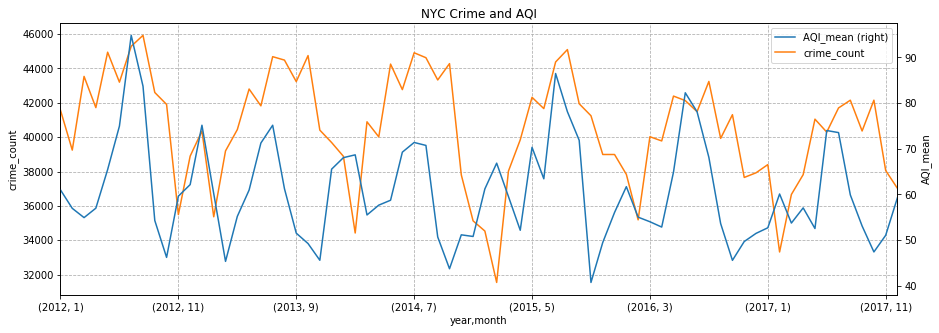

In [169]:
ax = NYC_crime_airpollution.plot(
    secondary_y=['AQI_mean'],
    
    grid=True,figsize=(15,5))
 
ax.set_title("NYC Crime and AQI")
ax.set_ylabel('crime_count')
ax.grid(linestyle="--", alpha=3)
ax.right_ax.set_ylabel('AQI_mean')
 
plt.show()

In [126]:
NYC_crime_airpollution.corr() 

,AQI_mean,crime_count
AQI_mean,1.000000,0.304485
crime_count,0.304485,1.000000


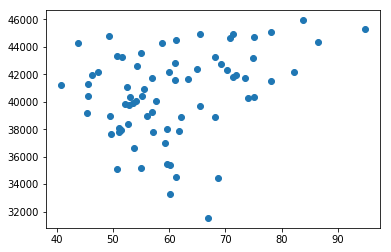

In [127]:
plt.scatter(NYC_crime_airpollution.AQI_mean, NYC_crime_airpollution.crime_count)

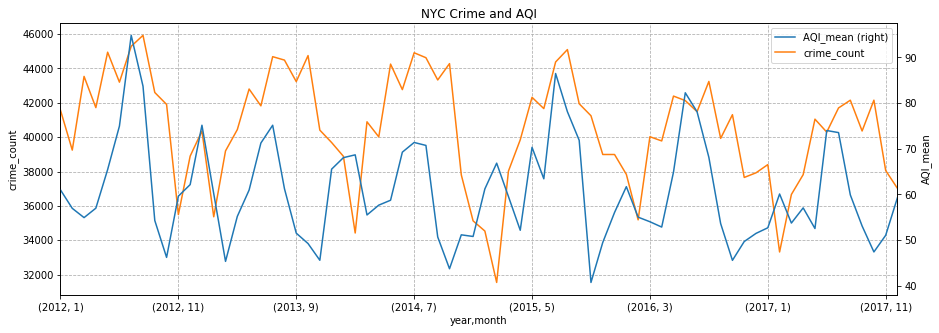

In [167]:
NYC_crime_type = NYC_crime[['PD_DESC','PD_CD']].groupby(['PD_DESC']).count().rename(columns={"PD_CD":'count'})
NYC_crime_type.sort_values("count", ascending = False).head(30)


,count
PD_DESC,
ASSAULT 3,521223
"HARASSMENT,SUBD 3,4,5",461926
AGGRAVATED HARASSMENT 2,322742
"HARASSMENT,SUBD 1,CIVILIAN",274329
"LARCENY,PETIT FROM STORE-SHOPL",270461
"LARCENY,PETIT FROM BUILDING,UN",260124
"MISCHIEF, CRIMINAL 4, OF MOTOR",217936
"LARCENY,PETIT FROM AUTO",202585
"MARIJUANA, POSSESSION 4 & 5",192817
